In [78]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema

## Oppgave a)

In [39]:
xs = np.array([2007, 2009, 2011, 2013, 2015, 2017])
ys = np.array([400, 650, 1100, 1850, 2400, 3000])

In [4]:
def model(t, a, b, c, d):
    return a * t ** 3 + b * t ** 2 + c * t + d

In [17]:
coeffs, _ = curve_fit(model, xs, ys)
coeffs

array([-6.24697083e-01,  3.78026873e+03, -7.62492607e+06,  5.12635440e+09])

In [14]:
xs_model = np.linspace(2000, 2040, 1000)
ys_model = model(xs_model, *coeffs)

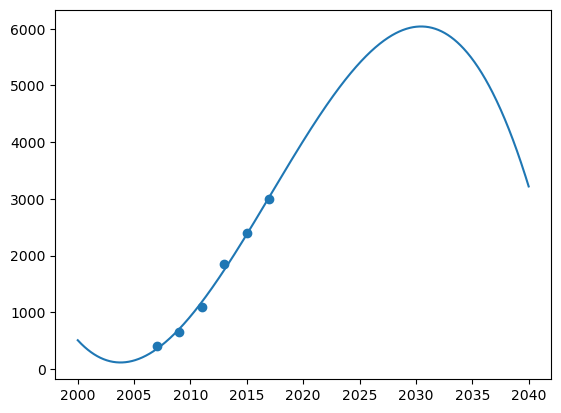

In [16]:
plt.plot(xs_model, ys_model)
plt.scatter(xs, ys)

## Oppgave b)

In [19]:
def f(x):
    return -2.6 * x ** 3 + 49 * x ** 2 + 33 * x + 398

In [25]:
f(14)

3329.5999999999995

In [26]:
def g(x):
    return 3330 * 0.96 ** (x - 14)

In [32]:
def h(x):
    return np.where(x < 14, f(x), g(x))

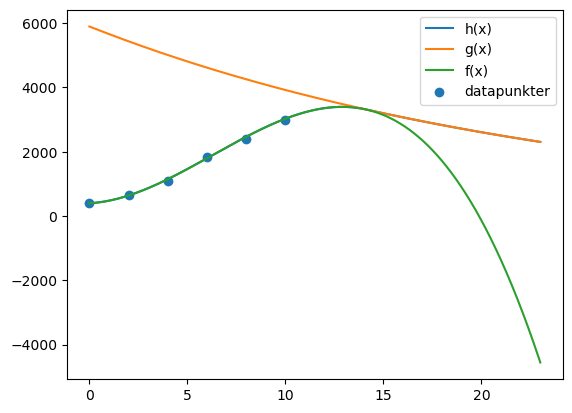

In [54]:
xs_c = np.linspace(0, 2030 - 2007, 1000)
ys_c = h(xs_c)
plt.plot(xs_c, ys_c, label="h(x)")
plt.plot(xs_c, g(xs_c), label="g(x)")
plt.plot(xs_c, f(xs_c), label="f(x)")
plt.scatter(xs - xs[0], ys, label="datapunkter")
plt.legend()

In [63]:
max_idx = argrelextrema(h(xs_c), np.greater)[0]
(xs_c[max_idx], ys_c[max_idx])

(array([12.89289289]), array([3396.40166503]))

(array([ 6.28528529, 13.997998  ]),
 array([1895.57273833, 3329.84760659]),
 array([ 340.81905309, -119.80947045]))

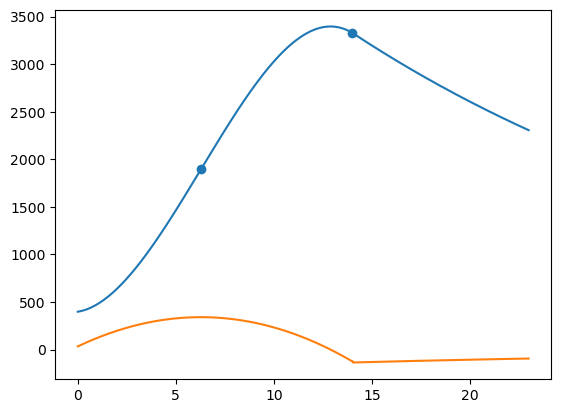

In [65]:
dh = np.gradient(ys_c, xs_c) # derivert
max_idx = argrelextrema(dh, np.greater)[0]

plt.plot(xs_c, ys_c)
plt.plot(xs_c, dh)
plt.scatter(xs_c[max_idx], ys_c[max_idx])

(xs_c[max_idx], ys_c[max_idx], dh[max_idx])

(np.float64(9.8998998998999), np.float64(16.553553553553556))

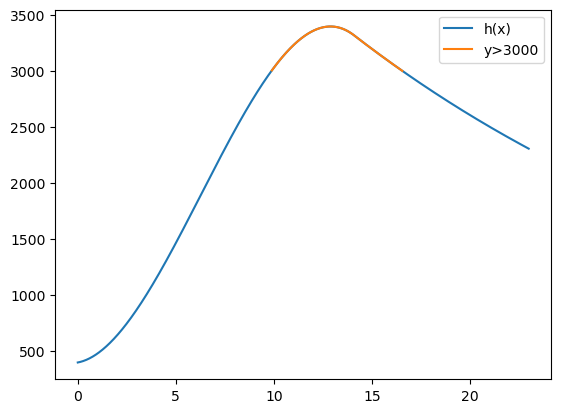

In [77]:
xs_f = xs_c[ys_c > 3000]

plt.plot(xs_c, ys_c, label="h(x)")
plt.plot(xs_f, h(xs_f), label="y>3000")
plt.legend()

(xs_f[0], xs_f[-1])